In [1]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import matplotlib.patches as patches
import sys
sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from experiments.viz import *
from experiments import viz

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

/accounts/projects/vision/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


num_datasets 11 9


# overarching plots

100%|██████████| 6/6 [00:00<00:00, 20.81it/s]


<Figure size 648x360 with 0 Axes>

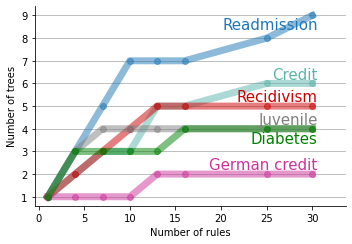

In [22]:
num_dsets = 6
datasets = DATASETS_CLASSIFICATION[::-1][:6] #+ DATASETS_REGRESSION[::-1]

R, C = ceil(num_dsets / 3), 3
plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')

COLORS = [cb, cg, cr, 'gray', cp, 'green']
COLORS = COLORS + COLORS + COLORS
plt.figure(figsize=(5, 3.5))
for i, dset in enumerate(tqdm(datasets)):
    dset_name = dset[0]

    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    data = pkl.load(open(pkl_file, 'rb')) #['df']

    rules = data['rule_df']
    rules['model'] = rules.index
    rules.index = np.arange(rules.shape[0])

    df = data['df']
    df['model'] = df.index
    df.index = np.arange(df.shape[0])
    
    cols_to_use = df.columns.difference(rules.columns)
    d = rules.join(df[cols_to_use])

    g = d[d.model == 'SAPS']
    name = 'SAPS'
    est_params = g[dset_name]
    trees = [x[0] for x in est_params]
    n_trees = np.array([len(t) for t in trees])

    x = g[f'{dset_name}_complexity'].values

    plt.plot(x, n_trees, 'o-',
             alpha=0.5,
             label=dset_name.capitalize().replace('-', ' '), color=COLORS[i], lw=7)
    plt.ylabel('Number of trees')
    plt.xlabel('Number of rules')


dvu.line_legend(adjust_text_labels=True)
plt.grid(axis='y')
viz.savefig('num_trees')

In [20]:
df.head()

,max_depth,diabetes_rocauc_train,diabetes_accuracy_train,diabetes_f1_train,diabetes_recall_train,diabetes_precision_train,diabetes_avg_precision_train,diabetes_best_accuracy_train,diabetes_rocauc_test,diabetes_accuracy_test,...,mean_precision,mean_avg_precision,mean_best_accuracy,mean_complexity,mean_time,n_estimators,include_linear,max_rules,posthoc_ridge,model
0,1.0,0.706895,0.726384,0.621622,0.641860,0.602620,0.512205,0.726384,0.750514,0.772727,...,0.586178,0.537712,0.749556,1.0,0.001026,NaN,NaN,NaN,NaN,CART
1,2.0,0.791630,0.770358,0.629921,0.558140,0.722892,0.618407,0.770358,0.794134,0.779221,...,0.673204,0.619108,0.774790,3.0,0.001187,NaN,NaN,NaN,NaN,CART
2,3.0,0.829877,0.776873,0.656642,0.609302,0.711957,0.690638,0.776873,0.816832,0.785714,...,0.704252,0.688889,0.781294,7.0,0.001458,NaN,NaN,NaN,NaN,CART
3,4.0,0.881512,0.814332,0.720588,0.683721,0.761658,0.769525,0.814332,0.811134,0.753247,...,0.722956,0.731750,0.796777,15.0,0.001792,NaN,NaN,NaN,NaN,CART
4,5.0,0.910305,0.850163,0.781991,0.767442,0.797101,0.833686,0.850163,0.815991,0.753247,...,0.751853,0.775369,0.814692,26.0,0.002171,NaN,NaN,NaN,NaN,CART


In [21]:
rules.head()

,max_depth,diabetes,n_estimators,include_linear,max_rules,posthoc_ridge,model
0,1.0,,NaN,NaN,NaN,NaN,CART
1,2.0,,NaN,NaN,NaN,NaN,CART
2,3.0,,NaN,NaN,NaN,NaN,CART
3,4.0,,NaN,NaN,NaN,NaN,CART
4,5.0,,NaN,NaN,NaN,NaN,CART


In [18]:
rules.index

Index(['CART', 'CART', 'CART', 'CART', 'CART', 'Rulefit', 'Rulefit', 'Rulefit',
       'Rulefit', 'Rulefit', 'Rulefit', 'Rulefit', 'Rulefit', 'Rulefit',
       'Rulefit', 'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'C45', 'C45', 'C45', 'C45', 'C45', 'C45',
       'C45', 'C45', 'SAPS', 'SAPS', 'SAPS', 'SAPS', 'SAPS', 'SAPS', 'SAPS',
       'SAPS', 'SAPS_(Reweighted)', 'SAPS_(Reweighted)', 'SAPS_(Reweighted)',
       'SAPS_(Reweighted)', 'SAPS_(Reweighted)', 'SAPS_(Reweighted)',
       'SAPS_(Reweighted)', 'SAPS_(Reweighted)'],
      dtype='object')

In [17]:
df.index

Index(['CART', 'CART', 'CART', 'CART', 'CART', 'Rulefit', 'Rulefit', 'Rulefit',
       'Rulefit', 'Rulefit', 'Rulefit', 'Rulefit', 'Rulefit', 'Rulefit',
       'Rulefit', 'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'SAPS_(Include_Linear)',
       'SAPS_(Include_Linear)', 'C45', 'C45', 'C45', 'C45', 'C45', 'C45',
       'C45', 'C45', 'SAPS', 'SAPS', 'SAPS', 'SAPS', 'SAPS', 'SAPS', 'SAPS',
       'SAPS', 'SAPS_(Reweighted)', 'SAPS_(Reweighted)', 'SAPS_(Reweighted)',
       'SAPS_(Reweighted)', 'SAPS_(Reweighted)', 'SAPS_(Reweighted)',
       'SAPS_(Reweighted)', 'SAPS_(Reweighted)'],
      dtype='object')

In [ ]:
make_comparison_grid(metric='r2', num_dsets=9, datasets=DATASETS_REGRESSION,
                models_to_include=['SAPS', 'CART', 'Rulefit', 'C45', 'CART_(MSE)', 'CART_(MAE)'],
                save_name='regression') # neg_mean_squared_error, r2

In [ ]:
# make_comparison_grid(metric='rocauc', num_dsets=6, datasets=DATASETS_CLASSIFICATION,
#                 models_to_include=['SAPS', 'SAPS_(Include_Linear)', 'SAPS_(Reweighted)'],
#                 save_name='classification_variants') # neg_mean_squared_error, r2

In [ ]:
# make_comparison_grid(metric='r2', num_dsets=9, datasets=DATASETS_REGRESSION,
#                 models_to_include=['SAPS', 'SAPS_(Include_Linear)', 'SAPS_(Reweighted)'],
#                 save_name='regression_variants') # neg_mean_squared_error, r2

In [ ]:
metric = 'mse'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index

    plt.figure(figsize=(6, 4))
    #     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                 label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                  label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        #         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)